### Compare the two different sampling approaches (sampling on grid + voronoi and bridson sampling + fps) with respect to rdf and energy

In [3]:
from partial_rdf import *

In [2]:
"""load files"""
from ase.io import read, write
import quippy
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

voro_structs = read("grid_voro/final_compressed_voro.xyz", ":")
bridson_fps_structs = read("bridson_fps/final_compressed_fps.xyz", ":")


In [4]:
def get_density(atoms):
    """Get density of cell in g/cm^3"""
    masses = atoms.get_masses()
    N_A = 6.022 * 10 ** 23
    mass = sum([mass / N_A for mass in masses])
    volume = atoms.get_volume() * 10 ** (-24)
    density = mass / volume
    return(density)
from ase.io import read


def convert_symbols(str):
    dict = {"Li":"S", "He":"P", "H":"Na"}
    for key in dict.keys():
        str = str.replace(key, dict[key])
    return str

def read_dump(path, s=":"):
    atomslist = read(path, s)
    if not type(atomslist) is list:
        atomslist.symbols = convert_symbols(str(atomslist.symbols))
        return atomslist
    for i in range(len(atomslist)):
        atomslist[i].symbols = convert_symbols(str(atomslist[i].symbols))
    return atomslist



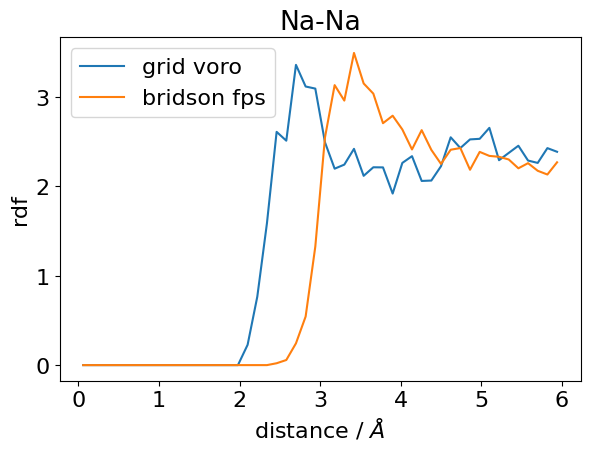

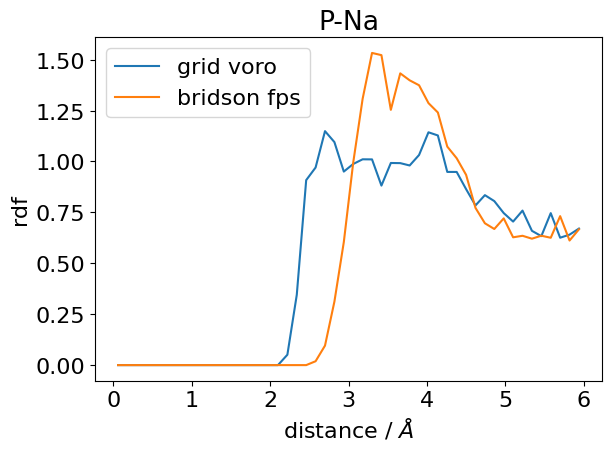

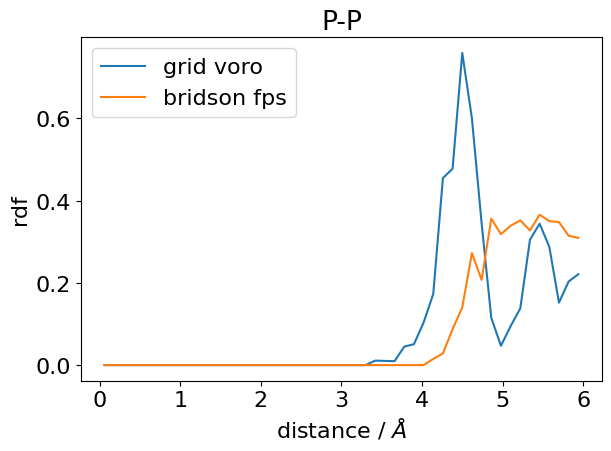

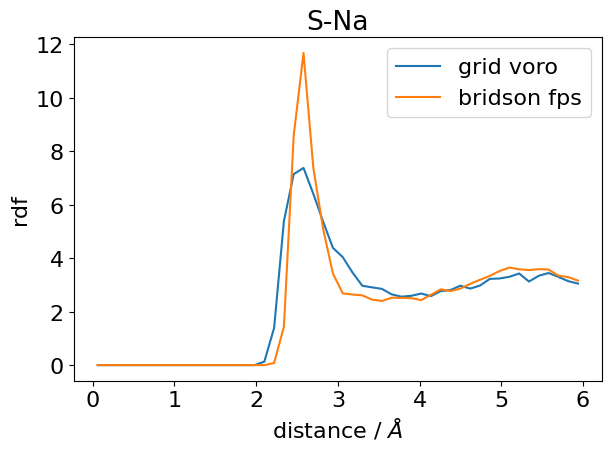

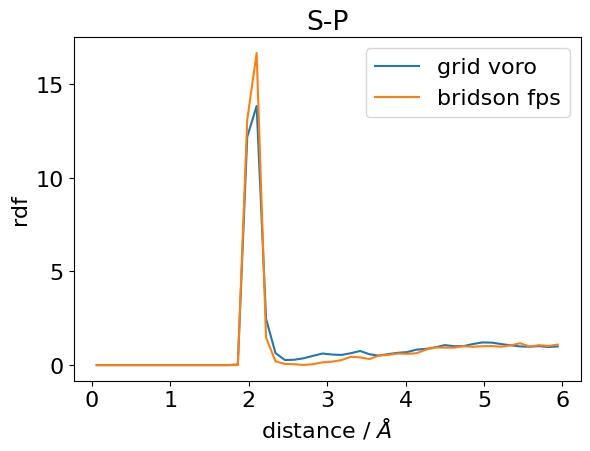

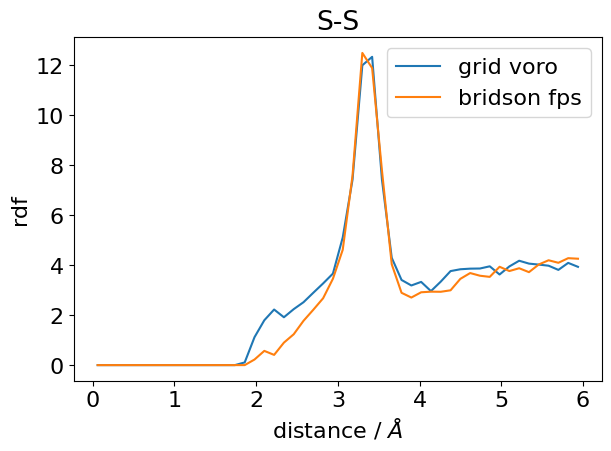

In [ ]:
"""rdfs"""
for i, el1 in enumerate(["Na", "P", "S"]):
    for j, el2 in enumerate(["Na", "P", "S"]):
        if not j > i:
            rdf_av_fps, rdf_av_voro = [],[]
            for bridson_fps_struct, voro_struct in zip(bridson_fps_structs, voro_structs):
                rdf_fps, dist = get_partial_rdf(bridson_fps_struct, 6, 50, el1, el2)
                rdf_voro, dist = get_partial_rdf(voro_struct, 6, 50, el1, el2)
                rdf_av_fps.append(rdf_fps)
                rdf_av_voro.append(rdf_voro)
            fig = plt.figure()
            ax = fig.add_subplot(111)
            rdf_av_fps = np.average(np.array(rdf_av_fps),axis=0)
            rdf_av_voro = np.average(np.array(rdf_av_voro), axis=0)
            plt.plot(dist, rdf_av_voro, label="grid voro")
            plt.plot(dist, rdf_av_fps, label="bridson fps")
            plt.xlabel("distance / $\AA$")
            plt.ylabel("rdf")
            plt.title(f"{el1}-{el2}")
            plt.legend()
            plt.tight_layout()
            plt.show()

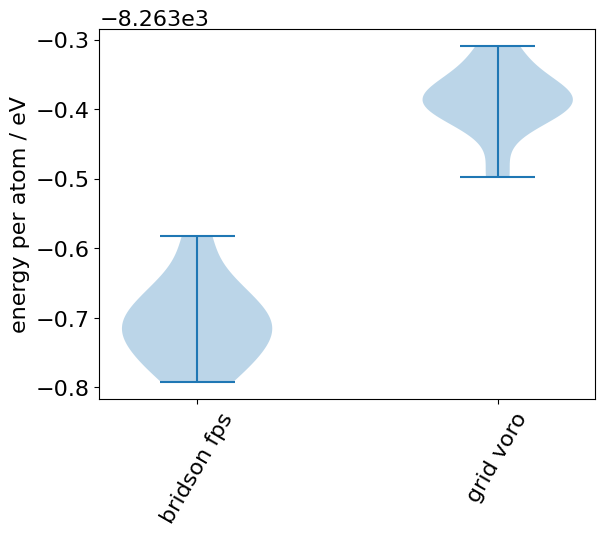

In [ ]:
import quippy
"""energetics"""
pot = quippy.potential.Potential(param_filename="../tests/amorphous_lps_sampling_copy/gap/gp_2b_soap.xml")
fps_energies = []
voro_energies = []
for bridson_fps_struct in bridson_fps_structs:
    pot.calculate(bridson_fps_struct, ["forces", "energy"])
    fps_energies.append(pot.results["energy"]/len(bridson_fps_struct))
for voro_struct in voro_structs:
    pot.calculate(voro_struct, ["forces", "energy"])
    voro_energies.append(pot.results["energy"]/len(voro_struct))
plt.violinplot([fps_energies, voro_energies], positions=[0,1])
plt.xticks([0,1], ["bridson fps", "grid voro"], rotation=60)
plt.ylabel("energy per atom / eV")
plt.show()



### Compare after sampling and add computational sintering as possible "sampling" method

In [5]:
from ase.io import read


def convert_symbols(str):
    dict = {"Li":"S", "He":"P", "H":"Na"}
    for key in dict.keys():
        str = str.replace(key, dict[key])
    return str

def read_dump(path, s=":"):
    atomslist = read(path, s)
    if not type(atomslist) is list:
        atomslist.symbols = convert_symbols(str(atomslist.symbols))
        return atomslist
    for i in range(len(atomslist)):
        atomslist[i].symbols = convert_symbols(str(atomslist[i].symbols))
    return atomslist



In [5]:
voro_structs = []
for i in range(1):
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4/3/geom.dump","-5:"))
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4_1/3/geom.dump","-5:"))
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4_2/3/geom.dump","-5:"))

In [ ]:
voro_structs

[Atoms(symbols='Na180P60S240', pbc=True, cell=[22.697513124212215, 22.7001244111354, 23.133501402650165]),
 Atoms(symbols='Na180P60S240', pbc=True, cell=[22.697513124212215, 22.7001244111354, 23.133501402650165]),
 Atoms(symbols='Na180P60S240', pbc=True, cell=[22.697513124212215, 22.7001244111354, 23.133501402650165]),
 Atoms(symbols='Na180P60S240', pbc=True, cell=[22.697513124212215, 22.7001244111354, 23.133501402650165]),
 Atoms(symbols='Na180P60S240', pbc=True, cell=[22.697513124212215, 22.7001244111354, 23.133501402650165]),
 Atoms(symbols='Na180P60S240', pbc=True, cell=[22.698531770898587, 22.70209550710893, 23.13442811689921]),
 Atoms(symbols='Na180P60S240', pbc=True, cell=[22.698531770898587, 22.70209550710893, 23.13442811689921]),
 Atoms(symbols='Na180P60S240', pbc=True, cell=[22.698531770898587, 22.70209550710893, 23.13442811689921]),
 Atoms(symbols='Na180P60S240', pbc=True, cell=[22.698531770898587, 22.70209550710893, 23.13442811689921]),
 Atoms(symbols='Na180P60S240', pbc=Tr

In [7]:
"""rdfs"""
# define voro structs
import quippy
import matplotlib.pyplot as plt
pot = quippy.potential.Potential(param_filename="/work/data/iter_glass/gap_0306/new_gama_g3/gp_2b_soap.xml")
fps_energies = []
voro_energies = []
melt_quench_energies = []

voro_structs = []
for i in range(1):
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4/3/geom.dump","-5:"))
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4_1/3/geom.dump","-5:"))
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4_2/3/geom.dump","-5:"))
# define bridson structs
bridson_structs = []
for i in range(1):
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson/3/geom.dump","-5:"))
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson_1/3/geom.dump","-5:"))
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson_2/3/geom.dump","-5:"))
#define melt-quench
melt_quench_structs = []
#melt_quench = read_dump(f"/home/ytli/softwares/sampling_compare/melt_quench/0/geom.dump", "-1")
melt_quench_structs.extend(read_dump(f"//home/ytli/softwares/MD_analys_scripts/melt_quench/3/geom.dump","-15:"))
for voro_struct, bridson_struct, melt_quench_struct in zip(voro_structs, bridson_structs, melt_quench_structs):
    pot.calculate(voro_struct, ["forces", "energy"])
    voro_energies.append(pot.results["energy"]/len(voro_struct))

    pot.calculate(bridson_struct, ["forces", "energy"])
    fps_energies.append(pot.results["energy"]/len(bridson_struct))

    pot.calculate(melt_quench_struct, ["forces", "energy"])
    melt_quench_energies.append(pot.results["energy"]/len(melt_quench_struct))


plt.violinplot([fps_energies, voro_energies, melt_quench_energies], positions=[0,1,2])
plt.xticks([0, 1, 2], ["bridson fps", "grid voro", "melt-quench"], rotation=60)
plt.ylabel("energy per atom / eV")
plt.show()

AttributeError: 'list' object has no attribute 'cell'

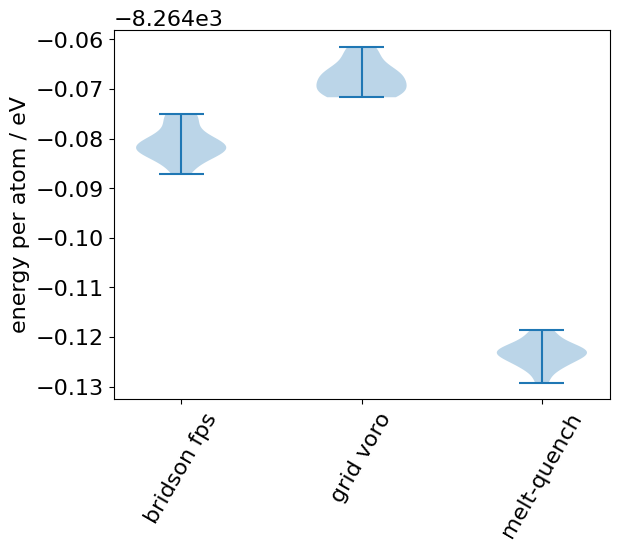

In [8]:
for voro_struct, bridson_struct, melt_quench_struct in zip(voro_structs, bridson_structs, melt_quench_structs):
    pot.calculate(voro_struct, ["forces", "energy"])
    voro_energies.append(pot.results["energy"]/len(voro_struct))

    pot.calculate(bridson_struct, ["forces", "energy"])
    fps_energies.append(pot.results["energy"]/len(bridson_struct))

    pot.calculate(melt_quench_struct, ["forces", "energy"])
    melt_quench_energies.append(pot.results["energy"]/len(melt_quench_struct))


plt.violinplot([fps_energies, voro_energies, melt_quench_energies], positions=[0,1,2])
plt.xticks([0, 1, 2], ["bridson fps", "grid voro", "melt-quench"], rotation=60)
plt.ylabel("energy per atom / eV")
plt.show()

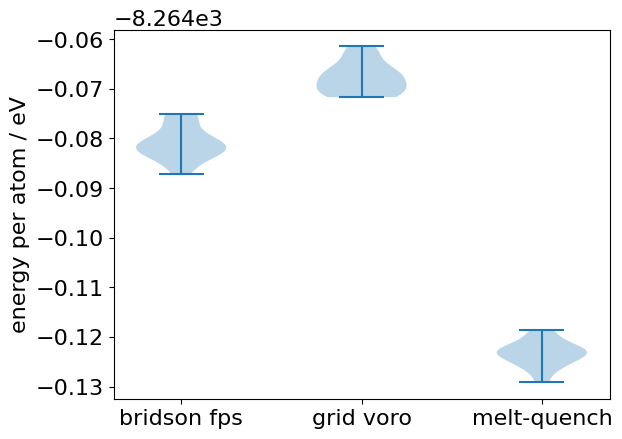

In [9]:
plt.violinplot([fps_energies, voro_energies, melt_quench_energies], positions=[0,1,2])
plt.xticks([0, 1, 2], ["bridson fps", "grid voro", "melt-quench"], rotation=0)
plt.ylabel("energy per atom / eV")
plt.show()

In [6]:
"""energetics"""
import quippy
import matplotlib.pyplot as plt
pot = quippy.potential.Potential(param_filename="/work/data/iter_glass/gap_0306/new_gama_g3/gp_2b_soap.xml")
fps_energies = []
voro_energies = []
melt_quench_energies = []
"""bridson"""
for i in range(3):
    struct = read_dump(f"/work/home/thuss/calc/naps/sampl_compar/bridson_fps/{i}/geom.dump", "-1")
    pot.calculate(struct, ["forces", "energy"])
    fps_energies.append(pot.results["energy"]/len(struct))
"""grid/voro"""
for i in range(3):
    struct = read_dump(f"/work/home/thuss/calc/naps/sampl_compar/grid_voro/{i}/geom.dump", "-1")
    pot.calculate(struct, ["forces", "energy"])
    voro_energies.append(pot.results["energy"]/len(struct))
"""melt-quench"""
struct = read_dump(f"/work/home/thuss/calc/naps/sampl_compar/grid_voro/{i}/geom.dump", "-1")
pot.calculate(struct, ["forces", "energy"])
melt_quench_energies.append(pot.results["energy"]/len(struct))
# ToDo
plt.violinplot([fps_energies, voro_energies, melt_quench_energies], positions=[0,1,2])
plt.xticks([0, 1, 2], ["bridson fps", "grid voro", "melt-quench"], rotation=60)
plt.ylabel("energy per atom / eV")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/work/home/thuss/calc/naps/sampl_compar/bridson_fps/0/geom.dump'

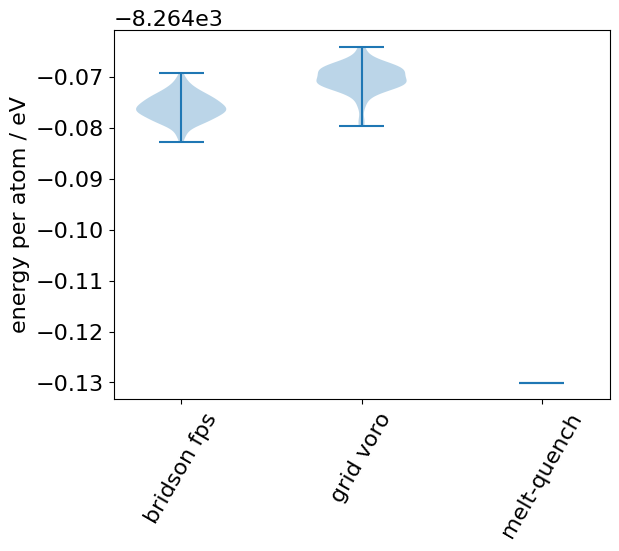

In [15]:
"""energetics"""
import quippy
import matplotlib.pyplot as plt
pot = quippy.potential.Potential(param_filename="/work/data/iter_glass/gap_0306/new_gama_g3/gp_2b_soap.xml")
fps_energies = []
voro_energies = []
melt_quench_energies = []
"""bridson"""
length = 100
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson/3/geom.dump","-100:")
for i in range(length):
    #struct = read_dump(f"bridson_fps/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    fps_energies.append(pot.results["energy"]/len(struct))
"""grid/voro"""
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4/3/geom.dump","-100:")
for i in range(length):
    #struct = read_dump(f"grid_voro/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    voro_energies.append(pot.results["energy"]/len(struct))
"""melt-quench"""
struct = read_dump(f"/home/ytli/softwares/sampling_compare/melt_quench/0/geom.dump", "-1")
pot.calculate(struct, ["forces", "energy"])
melt_quench_energies.append(pot.results["energy"]/len(struct))
# ToDo
plt.violinplot([fps_energies, voro_energies, melt_quench_energies], positions=[0,1,2])
plt.xticks([0, 1, 2], ["bridson fps", "grid voro", "melt-quench"], rotation=60)
plt.ylabel("energy per atom / eV")
plt.show()


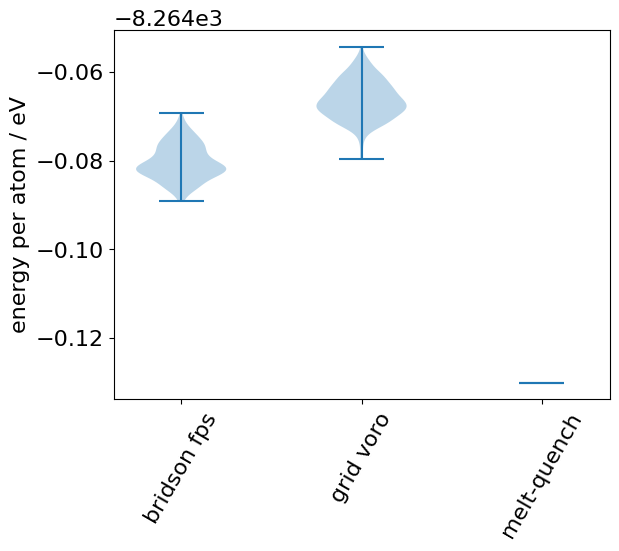

In [21]:
"""energetics"""
import quippy
import matplotlib.pyplot as plt
pot = quippy.potential.Potential(param_filename="/work/data/iter_glass/gap_0306/new_gama_g3/gp_2b_soap.xml")
fps_energies = []
voro_energies = []
melt_quench_energies = []
"""bridson"""
length = 100
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson/3/geom.dump","-100:")
for i in range(length):
    #struct = read_dump(f"bridson_fps/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    fps_energies.append(pot.results["energy"]/len(struct))
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson_1/3/geom.dump","-100:")
for i in range(length):
    #struct = read_dump(f"bridson_fps/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    fps_energies.append(pot.results["energy"]/len(struct))
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson_2/3/geom.dump","-100:")
for i in range(length):
    #struct = read_dump(f"bridson_fps/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    fps_energies.append(pot.results["energy"]/len(struct))
"""grid/voro"""
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4/3/geom.dump","-100:")
for i in range(length):
    #struct = read_dump(f"grid_voro/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    voro_energies.append(pot.results["energy"]/len(struct))
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4_1/3/geom.dump","-100:")
for i in range(length):
    #struct = read_dump(f"grid_voro/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    voro_energies.append(pot.results["energy"]/len(struct))
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4_2/3/geom.dump","-100:")
for i in range(length):
    #struct = read_dump(f"grid_voro/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    voro_energies.append(pot.results["energy"]/len(struct))
"""melt-quench"""
struct = read_dump(f"/home/ytli/softwares/sampling_compare/melt_quench/0/geom.dump", "-1")
pot.calculate(struct, ["forces", "energy"])
melt_quench_energies.append(pot.results["energy"]/len(struct))
# ToDo
plt.violinplot([fps_energies, voro_energies, melt_quench_energies], positions=[0,1,2])
plt.xticks([0, 1, 2], ["bridson fps", "grid voro", "melt-quench"], rotation=60)
plt.ylabel("energy per atom / eV")
plt.show()


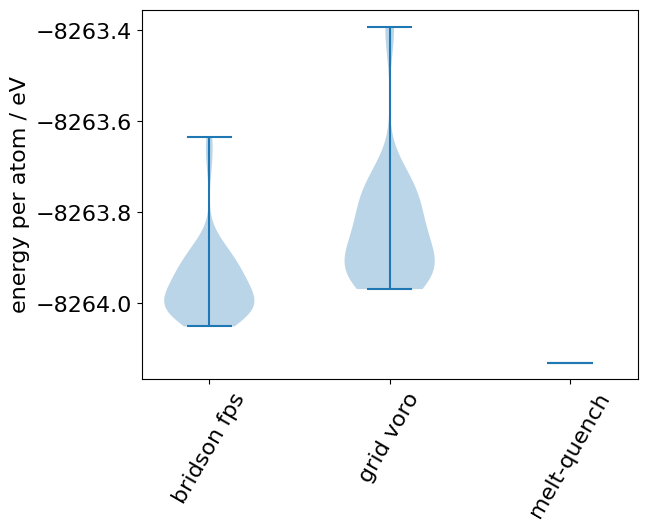

In [18]:
"""energetics"""
import quippy
import matplotlib.pyplot as plt
pot = quippy.potential.Potential(param_filename="/work/data/iter_glass/gap_0306/new_gama_g3/gp_2b_soap.xml")
fps_energies = []
voro_energies = []
melt_quench_energies = []
"""bridson"""
length = 20
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson/3/geom.dump",":20")
for i in range(length):
    #struct = read_dump(f"bridson_fps/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    fps_energies.append(pot.results["energy"]/len(struct))
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson_1/3/geom.dump",":20")
for i in range(length):
    #struct = read_dump(f"bridson_fps/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    fps_energies.append(pot.results["energy"]/len(struct))
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson_2/3/geom.dump",":20")
for i in range(length):
    #struct = read_dump(f"bridson_fps/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    fps_energies.append(pot.results["energy"]/len(struct))
"""grid/voro"""
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4/3/geom.dump",":20")
for i in range(length):
    #struct = read_dump(f"grid_voro/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    voro_energies.append(pot.results["energy"]/len(struct))
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4_1/3/geom.dump",":20")
for i in range(length):
    #struct = read_dump(f"grid_voro/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    voro_energies.append(pot.results["energy"]/len(struct))
struct_ls = read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4_2/3/geom.dump",":20")
for i in range(length):
    #struct = read_dump(f"grid_voro/{i}/geom.dump", "-1")
    struct = struct_ls[i]
    pot.calculate(struct, ["forces", "energy"])
    voro_energies.append(pot.results["energy"]/len(struct))
"""melt-quench"""
struct = read_dump(f"/home/ytli/softwares/sampling_compare/melt_quench/0/geom.dump", "-1")
pot.calculate(struct, ["forces", "energy"])
melt_quench_energies.append(pot.results["energy"]/len(struct))
# ToDo
plt.violinplot([fps_energies, voro_energies, melt_quench_energies], positions=[0,1,2])
plt.xticks([0, 1, 2], ["bridson fps", "grid voro", "melt-quench"], rotation=60)
plt.ylabel("energy per atom / eV")
plt.show()


In [20]:
len(voro_energies)

60

In [ ]:
"""rdfs"""
# define voro structs
voro_structs = []
for i in range(2,5):
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4/3/geom.dump","-5:"))
# define bridson structs
bridson_structs = []
for i in range(2,5):
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson/{i}/geom.dump","-5:"))
#define melt-quench
#melt_quench = read_dump(f"/home/ytli/softwares/sampling_compare/melt_quench/0/geom.dump", "-1")
melt_quench = read_dump(f"/home/ytli/softwares/MD_analys_scripts/0425/alpha_new/geom.dump", "-1")
for i, el1 in enumerate(["Na", "P", "S"]):
    for j, el2 in enumerate(["Na", "P", "S"]):
        if not j > i:
            rdf_av_fps, rdf_av_voro = [],[]
            for bridson_struct, voro_struct in zip(bridson_structs, voro_structs):
                rdf_fps, dist = get_partial_rdf(bridson_struct, 6, 50, el1, el2)
                rdf_voro, dist = get_partial_rdf(voro_struct, 6, 50, el1, el2)
                rdf_av_fps.append(rdf_fps)
                rdf_av_voro.append(rdf_voro)
            rdf_melt, dist = get_partial_rdf(melt_quench, 6,50, el1, el2)
            fig = plt.figure()
            ax = fig.add_subplot(111)
            rdf_av_fps = np.average(np.array(rdf_av_fps),axis=0)
            rdf_av_voro = np.average(np.array(rdf_av_voro), axis=0)
            plt.plot(dist, rdf_av_voro, label="grid voro")
            plt.plot(dist, rdf_av_fps, label="bridson fps")
            plt.plot(dist, rdf_melt, label="melt-quench")
            plt.xlabel("distance / $\AA$")
            plt.ylabel("rdf")
            plt.title(f"{el1}-{el2}")
            plt.legend()
            plt.tight_layout()
            plt.show()

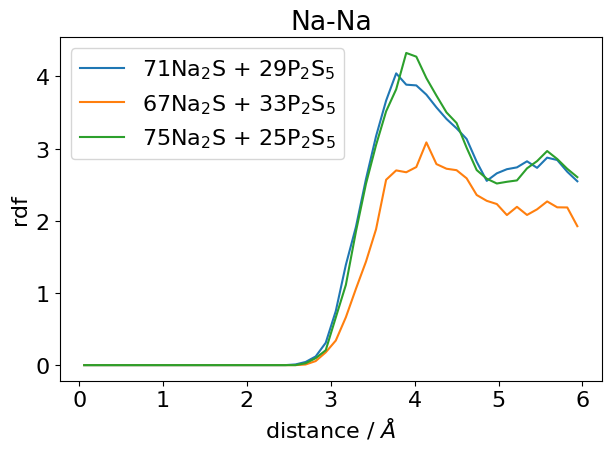

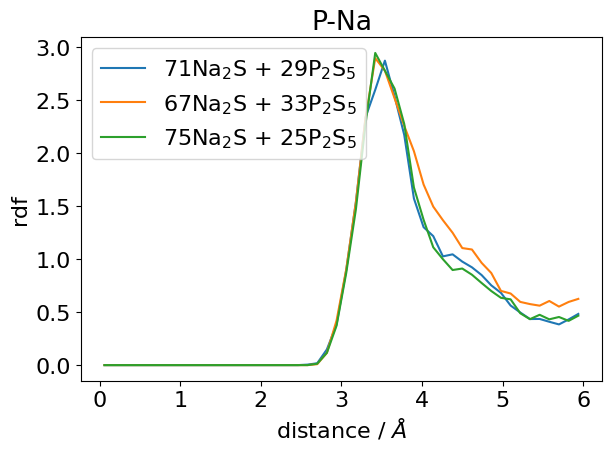

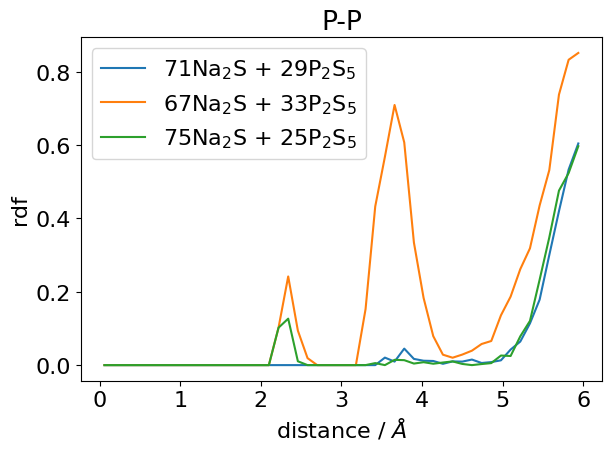

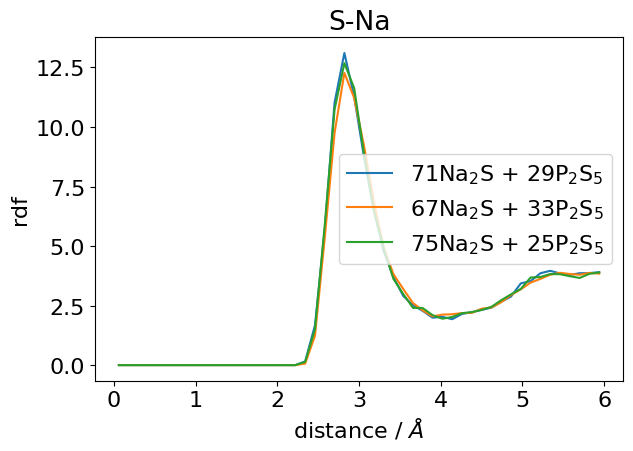

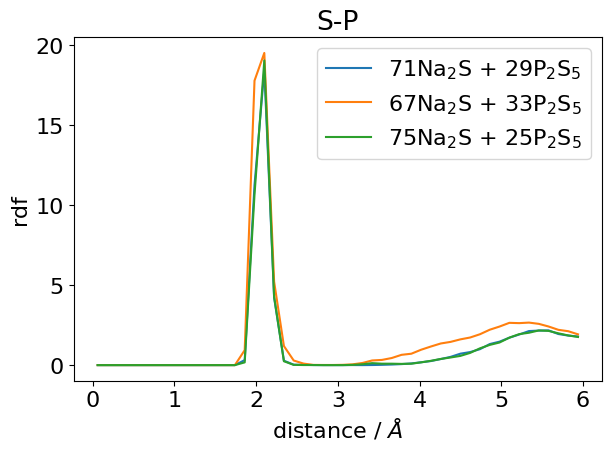

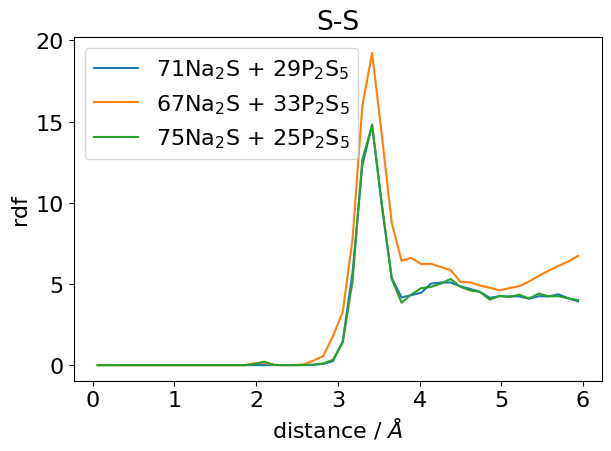

In [14]:
"""rdfs for crystal na3ps4 three phases: alpha, beta, gamma"""
# define voro structs
voro_structs = []
for i in range(1):
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4/3/geom.dump", "-100::5"))
# define bridson structs
bridson_structs = []
for i in range(1):
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na4p2s7/3/geom.dump", "-100::5"))
#define melt-quench
#melt_quench = read_dump(f"/home/ytli/softwares/sampling_compare/melt_quench/0/geom.dump", "-1")
melt_quench_structs = read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na7p3s11/3/geom.dump", "-100::5")
for i, el1 in enumerate(["Na", "P", "S"]):
    for j, el2 in enumerate(["Na", "P", "S"]):
        if not j > i:
            rdf_av_fps, rdf_av_voro, rdf_melt = [],[],[]
            for bridson_struct, voro_struct in zip(bridson_structs, voro_structs):
                rdf_fps, dist = get_partial_rdf(bridson_struct, 6, 50, el1, el2)
                rdf_voro, dist = get_partial_rdf(voro_struct, 6, 50, el1, el2)
                rdf_av_fps.append(rdf_fps)
                rdf_av_voro.append(rdf_voro)
            for melt_quench in melt_quench_structs:
                rdf_melt_0, dist = get_partial_rdf(melt_quench, 6,50, el1, el2)
                rdf_melt.append(rdf_melt_0)
            fig = plt.figure()
            ax = fig.add_subplot(111)
            rdf_av_fps = np.average(np.array(rdf_av_fps),axis=0)
            rdf_av_voro = np.average(np.array(rdf_av_voro), axis=0)
            rdf_melt = np.average(np.array(rdf_melt), axis=0)
            plt.plot(dist, rdf_melt, label="71Na$_2$S + 29P$_2$S$_5$")
            plt.plot(dist, rdf_av_fps, label="67Na$_2$S + 33P$_2$S$_5$")
            plt.plot(dist, rdf_av_voro, label="75Na$_2$S + 25P$_2$S$_5$")
            
            
            plt.xlabel("distance / $\AA$")
            plt.ylabel("rdf")
            plt.title(f"{el1}-{el2}")
            plt.legend()
            plt.tight_layout()
            plt.show()

In [1]:
"""rdfs for crystal na3ps4 three phases: alpha, beta, gamma"""
# define voro structs
voro_structs = []
for i in range(1):
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4/3/geom.dump", ":100:5"))
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4_1/3/geom.dump", ":100:5"))
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4_2/3/geom.dump", ":100:5"))
# define bridson structs
bridson_structs = []
for i in range(1):
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na4p2s7/3/geom.dump", ":100:5"))
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na4p2s7_1/3/geom.dump", ":100:5"))
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na4p2s7_2/3/geom.dump", ":100:5"))
#define melt-quench
#melt_quench = read_dump(f"/home/ytli/softwares/sampling_compare/melt_quench/0/geom.dump", "-1")
melt_quench_structs = []
melt_quench_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na7p3s11/3/geom.dump", ":100:5"))
melt_quench_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na7p3s11_1/3/geom.dump", ":100:5"))
melt_quench_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na7p3s11_2/3/geom.dump", ":100:5"))
for i, el1 in enumerate(["Na", "P", "S"]):
    for j, el2 in enumerate(["Na", "P", "S"]):
        if not j > i:
            rdf_av_fps, rdf_av_voro, rdf_melt = [],[],[]
            for bridson_struct, voro_struct in zip(bridson_structs, voro_structs):
                rdf_fps, dist = get_partial_rdf(bridson_struct, 6, 50, el1, el2)
                rdf_voro, dist = get_partial_rdf(voro_struct, 6, 50, el1, el2)
                rdf_av_fps.append(rdf_fps)
                rdf_av_voro.append(rdf_voro)
            for melt_quench in melt_quench_structs:
                rdf_melt_0, dist = get_partial_rdf(melt_quench, 6,50, el1, el2)
                rdf_melt.append(rdf_melt_0)
            fig = plt.figure()
            ax = fig.add_subplot(111)
            rdf_av_fps = np.average(np.array(rdf_av_fps),axis=0)
            rdf_av_voro = np.average(np.array(rdf_av_voro), axis=0)
            rdf_melt = np.average(np.array(rdf_melt), axis=0)
            plt.plot(dist, rdf_melt, label="71Na$_2$S + 29P$_2$S$_5$")
            plt.plot(dist, rdf_av_fps, label="67Na$_2$S + 33P$_2$S$_5$")
            plt.plot(dist, rdf_av_voro, label="75Na$_2$S + 25P$_2$S$_5$")
            
            
            plt.xlabel("distance / $\AA$")
            plt.ylabel("rdf")
            plt.title(f"{el1}-{el2}")
            plt.legend()
            plt.tight_layout()
            plt.show()

NameError: name 'read_dump' is not defined

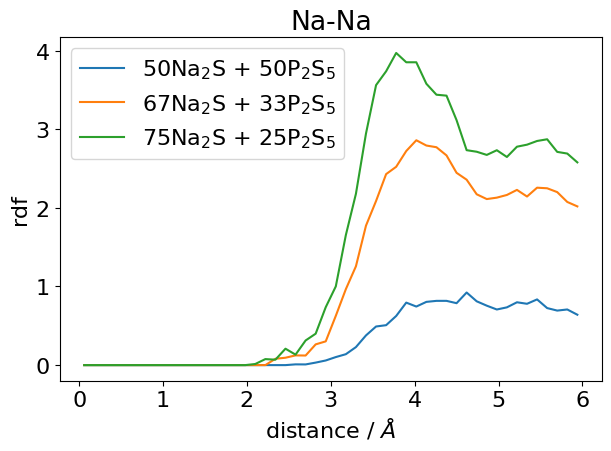

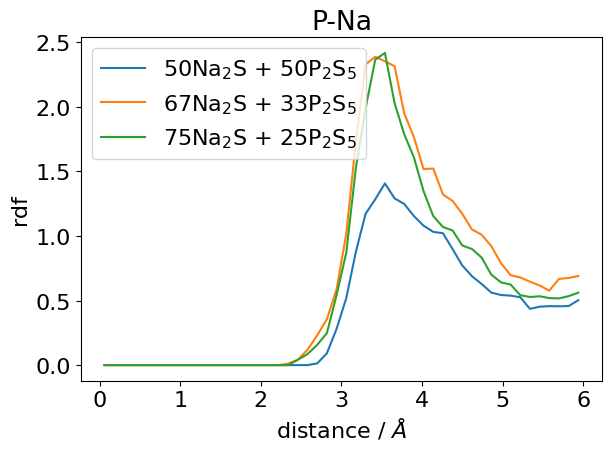

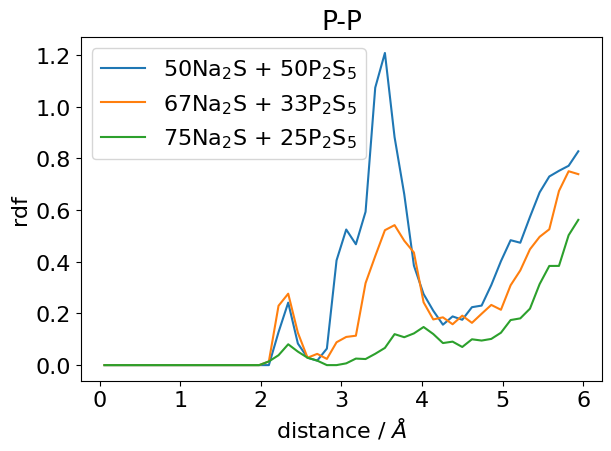

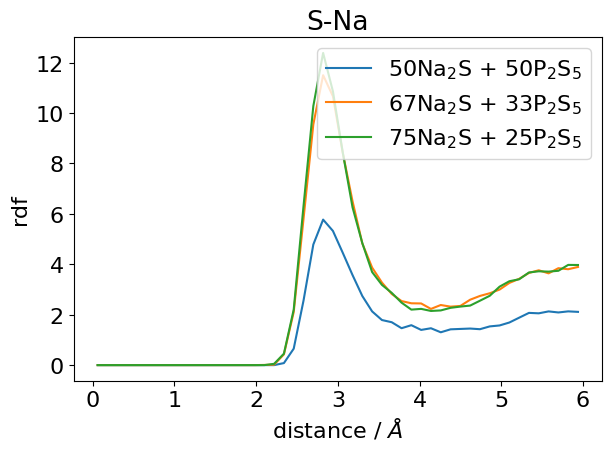

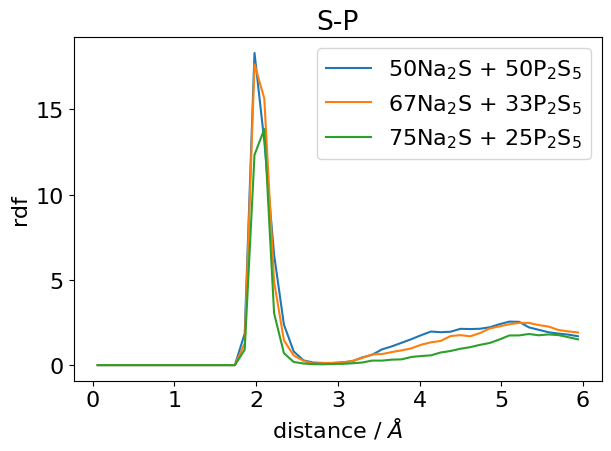

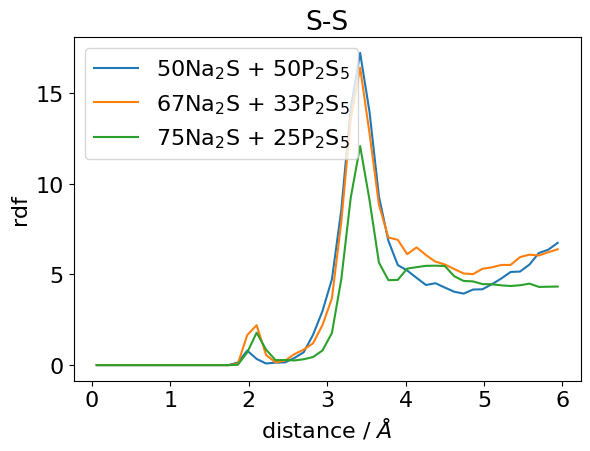

In [12]:
"""rdfs for crystal na3ps4 three phases: alpha, beta, gamma"""
# define voro structs
voro_structs = []
for i in range(1):
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0428/na3ps4/3/geom.dump", ":100:5"))
# define bridson structs
bridson_structs = []
for i in range(1):
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0428/na4p2s7/3/geom.dump", ":100:5"))
#define melt-quench
#melt_quench = read_dump(f"/home/ytli/softwares/sampling_compare/melt_quench/0/geom.dump", "-1")
melt_quench_structs = read_dump(f"/home/ytli/softwares/MD_analys_scripts/0428/naps3_new/3/geom.dump", ":100:5")
for i, el1 in enumerate(["Na", "P", "S"]):
    for j, el2 in enumerate(["Na", "P", "S"]):
        if not j > i:
            rdf_av_fps, rdf_av_voro, rdf_melt = [],[],[]
            for bridson_struct, voro_struct in zip(bridson_structs, voro_structs):
                rdf_fps, dist = get_partial_rdf(bridson_struct, 6, 50, el1, el2)
                rdf_voro, dist = get_partial_rdf(voro_struct, 6, 50, el1, el2)
                rdf_av_fps.append(rdf_fps)
                rdf_av_voro.append(rdf_voro)
            for melt_quench in melt_quench_structs:
                rdf_melt_0, dist = get_partial_rdf(melt_quench, 6,50, el1, el2)
                rdf_melt.append(rdf_melt_0)
            fig = plt.figure()
            ax = fig.add_subplot(111)
            rdf_av_fps = np.average(np.array(rdf_av_fps),axis=0)
            rdf_av_voro = np.average(np.array(rdf_av_voro), axis=0)
            rdf_melt = np.average(np.array(rdf_melt), axis=0)
            plt.plot(dist, rdf_melt, label="50Na$_2$S + 50P$_2$S$_5$")
            plt.plot(dist, rdf_av_fps, label="67Na$_2$S + 33P$_2$S$_5$")
            plt.plot(dist, rdf_av_voro, label="75Na$_2$S + 25P$_2$S$_5$")
            
            
            plt.xlabel("distance / $\AA$")
            plt.ylabel("rdf")
            plt.title(f"{el1}-{el2}")
            plt.legend()
            plt.tight_layout()
            plt.show()

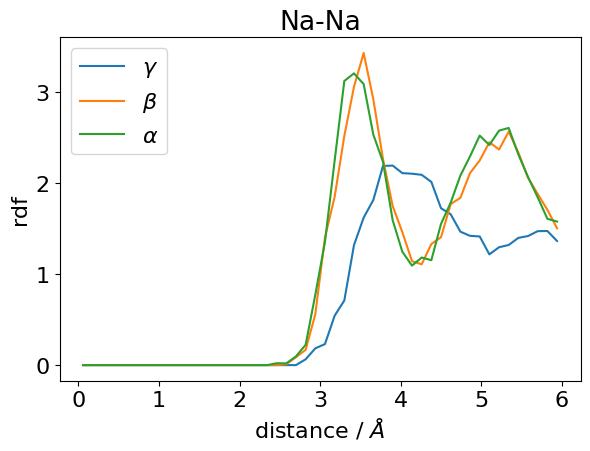

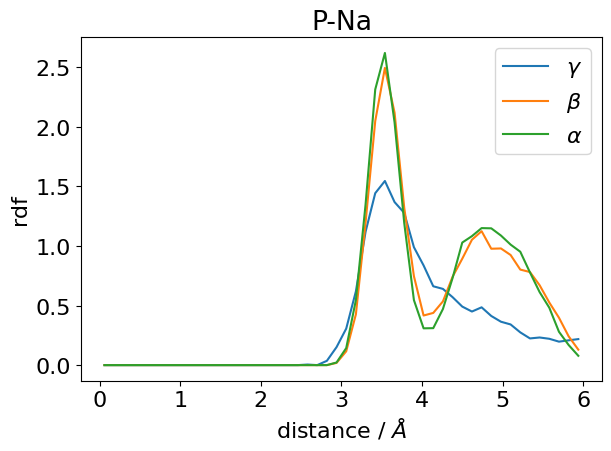

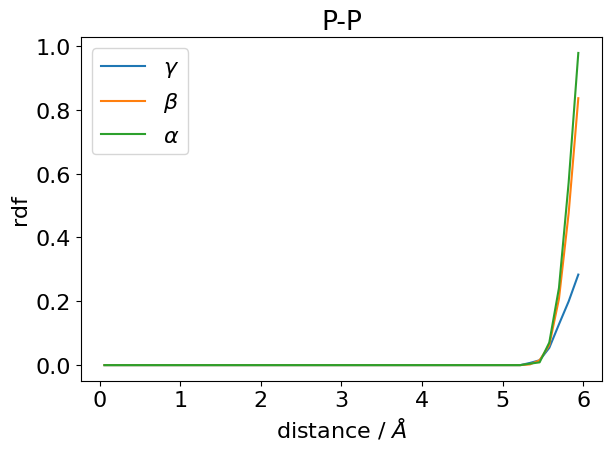

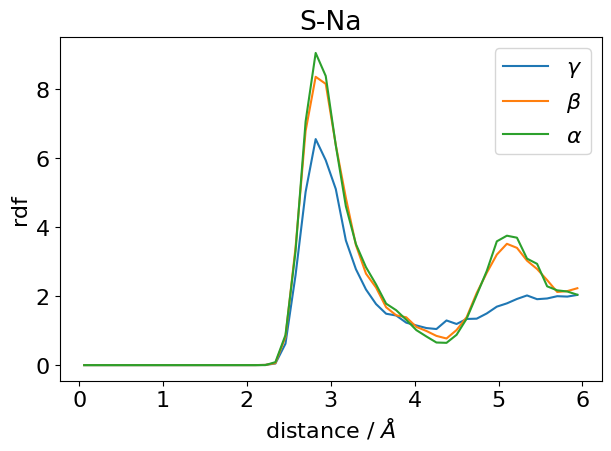

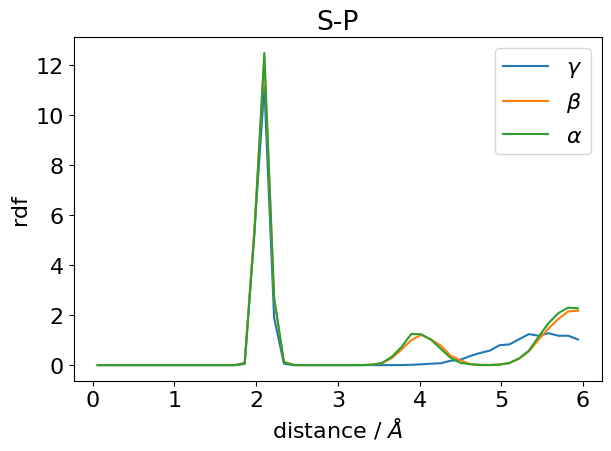

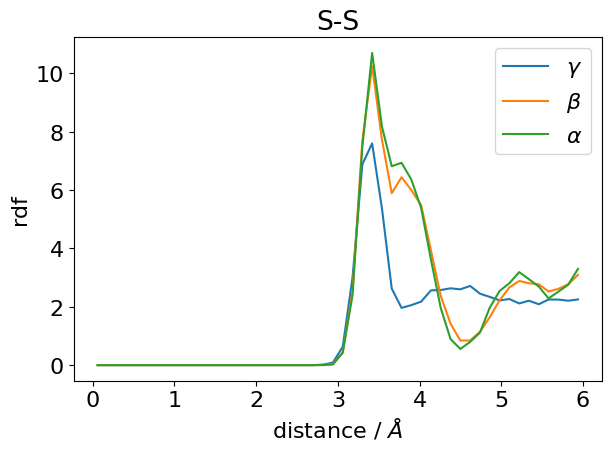

In [10]:
"""rdfs for crystal na3ps4 three phases: alpha, beta, gamma"""
# define voro structs
voro_structs = []
for i in range(1):
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0425/gama_new/3/geom.dump", "-100::5"))
# define bridson structs
bridson_structs = []
for i in range(1):
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0425/beta_new/3/geom.dump", "-100::5"))
#define melt-quench
#melt_quench = read_dump(f"/home/ytli/softwares/sampling_compare/melt_quench/0/geom.dump", "-1")
melt_quench_structs = read_dump(f"/home/ytli/softwares/MD_analys_scripts/0425/alpha_new/3/geom.dump", "-100::5")
for i, el1 in enumerate(["Na", "P", "S"]):
    for j, el2 in enumerate(["Na", "P", "S"]):
        if not j > i:
            rdf_av_fps, rdf_av_voro, rdf_melt = [],[],[]
            for bridson_struct, voro_struct in zip(bridson_structs, voro_structs):
                rdf_fps, dist = get_partial_rdf(bridson_struct, 6, 50, el1, el2)
                rdf_voro, dist = get_partial_rdf(voro_struct, 6, 50, el1, el2)
                rdf_av_fps.append(rdf_fps)
                rdf_av_voro.append(rdf_voro)
            for melt_quench in melt_quench_structs:
                rdf_melt_0, dist = get_partial_rdf(melt_quench, 6,50, el1, el2)
                rdf_melt.append(rdf_melt_0)
            fig = plt.figure()
            ax = fig.add_subplot(111)
            rdf_av_fps = np.average(np.array(rdf_av_fps),axis=0)
            rdf_av_voro = np.average(np.array(rdf_av_voro), axis=0)
            rdf_melt = np.average(np.array(rdf_melt), axis=0)
            plt.plot(dist, rdf_av_voro, label=r"$\gamma$")
            plt.plot(dist, rdf_av_fps, label=r"$\beta$")
            plt.plot(dist, rdf_melt, label=r"$\alpha$")
            plt.xlabel("distance / $\AA$")
            plt.ylabel("rdf")
            plt.title(f"{el1}-{el2}")
            plt.legend()
            plt.tight_layout()
            plt.show()

/home/ytli/anaconda3/envs/quip/lib/python3.9/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/ytli/anaconda3/envs/quip/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NameError: name 'rdf_melt' is not defined

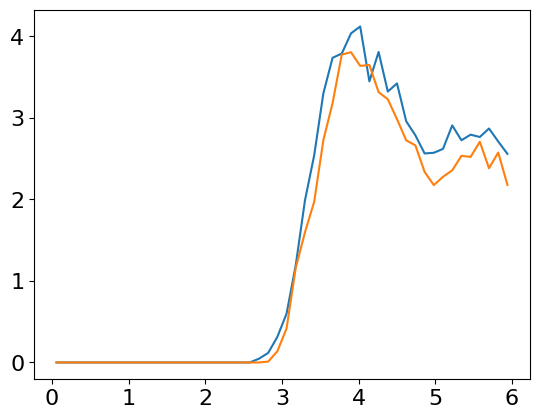

In [11]:
"""rdfs"""
# define voro structs
voro_structs = []
for i in range(1):
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4/3/geom.dump","-5:"))
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4_1/3/geom.dump","-5:"))
    voro_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/0322/na3ps4_2/3/geom.dump","-5:"))
# define bridson structs
bridson_structs = []
for i in range(1):
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson/3/geom.dump","-5:"))
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson_1/3/geom.dump","-5:"))
    bridson_structs.extend(read_dump(f"/home/ytli/softwares/MD_analys_scripts/bridson/na3ps4_bridson_2/3/geom.dump","-5:"))
#define melt-quench
melt_quench_structs = []
#melt_quench = read_dump(f"/home/ytli/softwares/sampling_compare/melt_quench/0/geom.dump", "-1")
melt_quench_structs.extend(read_dump(f"//home/ytli/softwares/MD_analys_scripts/melt_quench/3/geom.dump","-15:"))
for i, el1 in enumerate(["Na", "P", "S"]):
    for j, el2 in enumerate(["Na", "P", "S"]):
        if not j > i:
            rdf_av_melt,rdf_av_fps, rdf_av_voro = [],[],[]
            for bridson_struct, voro_struct in zip(bridson_structs, voro_structs):
                rdf_fps, dist = get_partial_rdf(bridson_struct, 6, 50, el1, el2)
                rdf_voro, dist = get_partial_rdf(voro_struct, 6, 50, el1, el2)
                rdf_av_fps.append(rdf_fps)
                rdf_av_voro.append(rdf_voro)
            #rdf_melt, dist = get_partial_rdf(melt_quench, 6,50, el1, el2)
            fig = plt.figure()
            ax = fig.add_subplot(111)
            rdf_av_fps = np.average(np.array(rdf_av_fps),axis=0)
            rdf_av_voro = np.average(np.array(rdf_av_voro), axis=0)
            rdf_av_melt = np.average(np.array(rdf_av_melt), axis=0)
            plt.plot(dist, rdf_av_voro, label="grid voro")
            plt.plot(dist, rdf_av_fps, label="bridson fps")
            plt.plot(dist, rdf_av_melt, label="melt-quench")
            plt.xlabel("distance / $\AA$")
            plt.ylabel("rdf")
            plt.title(f"{el1}-{el2}")
            plt.legend()
            plt.tight_layout()
            plt.show()

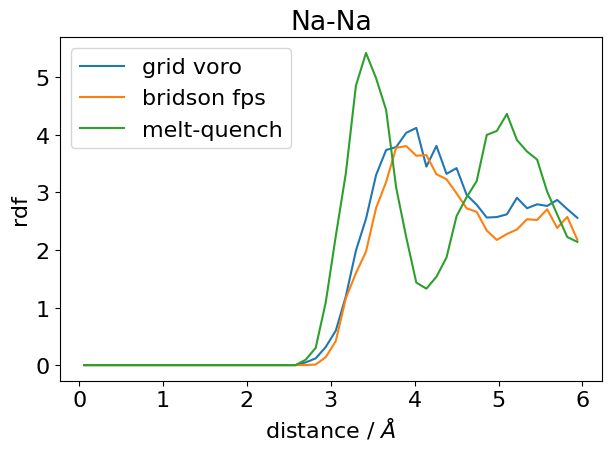

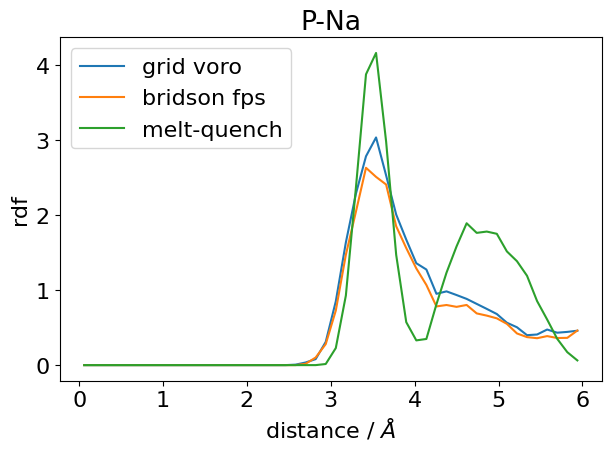

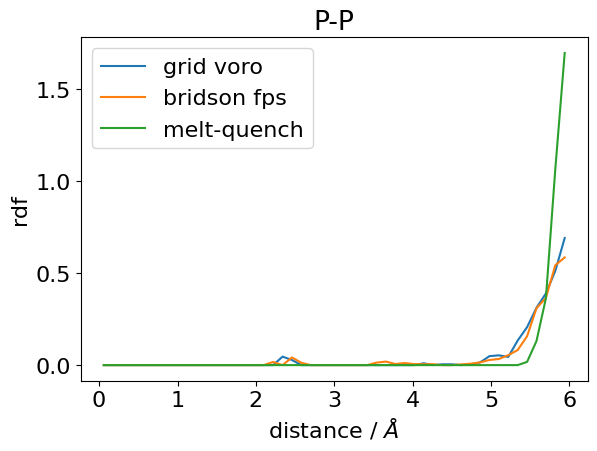

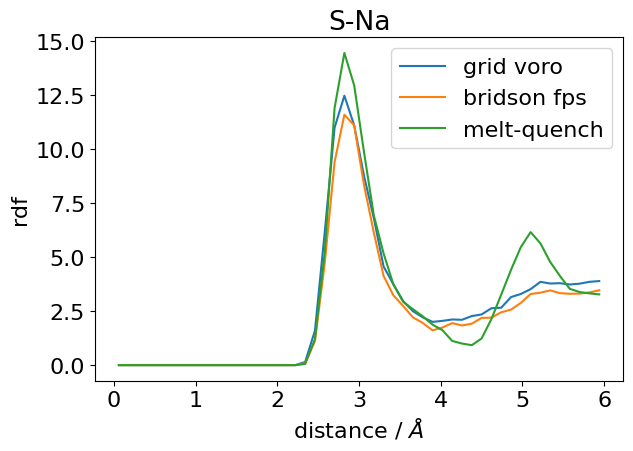

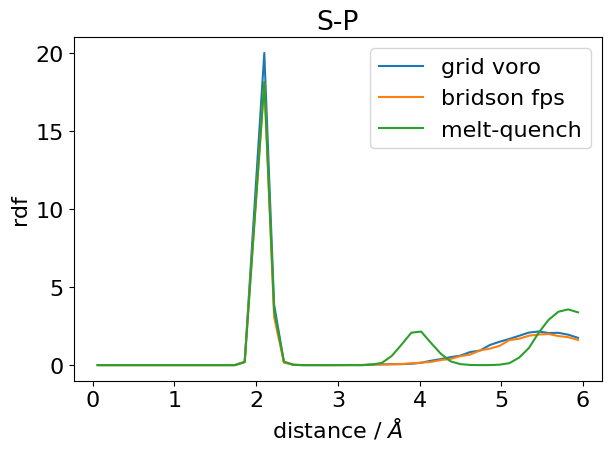

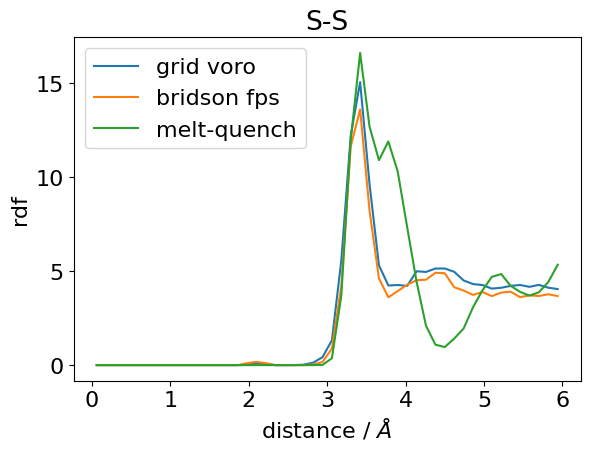

In [13]:
for i, el1 in enumerate(["Na", "P", "S"]):
    for j, el2 in enumerate(["Na", "P", "S"]):
        if not j > i:
            rdf_av_fps, rdf_av_voro, rdf_av_melt = [],[],[]
            for bridson_struct, voro_struct in zip(bridson_structs, voro_structs):
                rdf_fps, dist = get_partial_rdf(bridson_struct, 6, 50, el1, el2)
                rdf_voro, dist = get_partial_rdf(voro_struct, 6, 50, el1, el2)
                rdf_av_fps.append(rdf_fps)
                rdf_av_voro.append(rdf_voro)
            #rdf_melt, dist = get_partial_rdf(melt_quench, 6,50, el1, el2)
            for melt_quench in melt_quench_structs:
                rdf_melt, dist = get_partial_rdf(melt_quench, 6,50, el1, el2)
                rdf_av_melt.append(rdf_melt)
            fig = plt.figure()
            ax = fig.add_subplot(111)
            rdf_av_fps = np.average(np.array(rdf_av_fps),axis=0)
            rdf_av_voro = np.average(np.array(rdf_av_voro), axis=0)
            rdf_av_melt = np.average(np.array(rdf_av_melt), axis=0)
            plt.plot(dist, rdf_av_voro, label="grid voro")
            plt.plot(dist, rdf_av_fps, label="bridson fps")
            plt.plot(dist, rdf_av_melt, label="melt-quench")
            plt.xlabel("distance / $\AA$")
            plt.ylabel("rdf")
            plt.title(f"{el1}-{el2}")
            plt.legend()
            plt.tight_layout()
            plt.show()

Atoms(symbols='Na165P55S220', pbc=True, cell=[22.01072187018577, 22.010582418085008, 22.010562523828614])
<class 'ase.atoms.Atoms'>
Atoms(symbols='Na156P52S208', pbc=True, cell=[21.62978387951494, 21.6298183687353, 21.628865708135137])
<class 'ase.atoms.Atoms'>
Atoms(symbols='Na162P54S216', pbc=True, cell=[21.95219707077493, 21.952017032749048, 21.952379251785242])
<class 'ase.atoms.Atoms'>
<class 'ase.atoms.Atoms'>
<class 'ase.atoms.Atoms'>
<class 'ase.atoms.Atoms'>
<class 'ase.atoms.Atoms'>
[[0.84 0.08 0.08]]


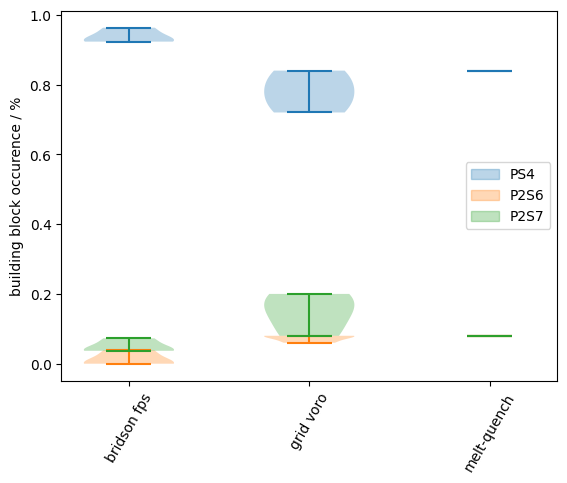

In [21]:
"""microchemistries"""
from microchemistry import get_building_blocks, get_el_atoms
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

fps_bb = []
voro_bb = []
melt_quench_bb = []
"""bridson"""
for i in range(3):
    struct = read_dump(f"/work/home/thuss/calc/naps/sampl_compar/bridson_fps/{i}/geom.dump", "-1")
    print(struct)
    fps_bb.append(get_building_blocks(struct))
fps_bb = np.array(fps_bb)
"""grid/voro"""
for i in range(3):
    struct = read_dump(f"/work/home/thuss/calc/naps/sampl_compar/grid_voro/{i}/geom.dump", "-1")
    voro_bb.append(get_building_blocks(struct))
voro_bb = np.array(voro_bb)
"""melt-quench"""
struct = read_dump(f"/work/home/thuss/calc/naps/sampl_compar/grid_voro/{i}/geom.dump", "-1")
melt_quench_bb.append(get_building_blocks(struct))
melt_quench_bb = np.array(melt_quench_bb)
print(melt_quench_bb)
labels = []
add_label(plt.violinplot([fps_bb[:,0], voro_bb[:,0], melt_quench_bb[:,0]], positions=[0,1,2]), label="PS4")
add_label(plt.violinplot([fps_bb[:,1], voro_bb[:,1], melt_quench_bb[:,1]], positions=[0,1,2]), label="P2S6")
add_label(plt.violinplot([fps_bb[:,2], voro_bb[:,2], melt_quench_bb[:,2]], positions=[0,1,2]), label="P2S7")
plt.legend(*zip(*labels), loc=5)
plt.xticks([0, 1, 2], ["bridson fps", "grid voro", "melt-quench"], rotation=60)
plt.ylabel("building block occurence / %")
plt.show()